In [4]:
import pandas as pd
import re

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

import sys

sys.path.append('../../Functions/')

from FeatureImportance import FeatureImportance
fi = FeatureImportance()

In [5]:
app_train = pd.read_pickle('../../Cleansed_Datasets/app_train_cleansed.pkl')
app_test = pd.read_pickle('../../Cleansed_Datasets/app_test_cleansed.pkl')

In [6]:
#some adjustments in the features names as the classifier modules is sensitive for special characters
app_train = app_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
app_test = app_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [7]:
X = app_train.loc[:, app_train.columns != 'TARGET']
y = app_train.TARGET
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature names
features = list(X_train.columns)

In [8]:
# Make the random forest classifier
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)
# Train on the training data
random_forest.fit(X_train, y_train)

# Extract feature importances
feature_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

# Make predictions on the test data
predictions = random_forest.predict_proba(X_test)[:, 1]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


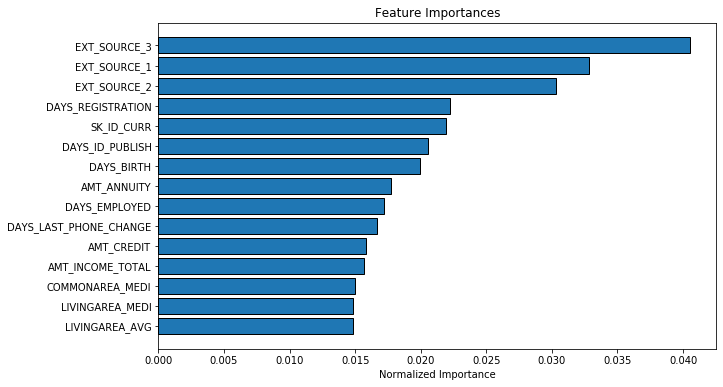

index                           feature  importance  \
0       30                      EXT_SOURCE_3    0.040523   
1       28                      EXT_SOURCE_1    0.032862   
2       29                      EXT_SOURCE_2    0.030278   
3        9                 DAYS_REGISTRATION    0.022249   
4        0                        SK_ID_CURR    0.021935   
..     ...                               ...         ...   
240     89                  FLAG_DOCUMENT_12    0.000000   
241    189  ORGANIZATION_TYPE_Industrytype13    0.000000   
242    219      ORGANIZATION_TYPE_Tradetype4    0.000000   
243    220      ORGANIZATION_TYPE_Tradetype5    0.000000   
244    111                    FLAG_OWN_CAR_Y    0.000000   

     importance_normalized  
0                 0.040523  
1                 0.032862  
2                 0.030278  
3                 0.022249  
4                 0.021935  
..                     ...  
240               0.000000  
241               0.000000  
242               0.000000  
243               0.000000  
244               0.000000  

[245 rows x 4 columns]

In [9]:
fi.plot_feature_importances(feature_importances)